In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread("photo/1.jpeg")
GRAY_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(GRAY_img.shape)
plt.imshow(GRAY_img, cmap = 'gray')

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-nxr3bp45/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [6]:
import pywt
import pywt.data


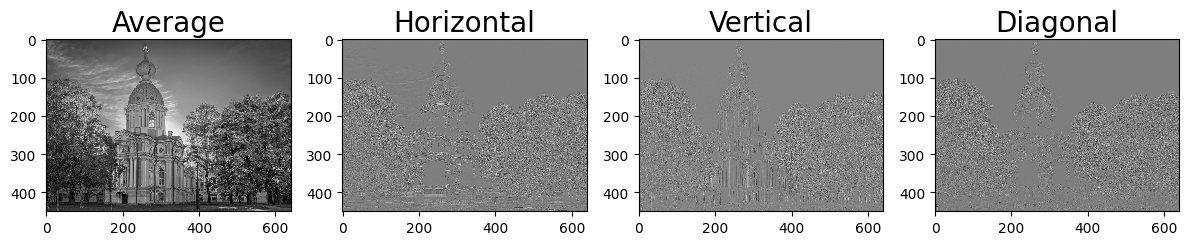

In [22]:
# Performing Haar wavelet transformation
c = pywt.dwt2(GRAY_img, 'haar')

# Getting 4 filters
cA, (cH, cV, cD) = c

# Displaying obtained filters on the screen
titles = ['Average', 'Horizontal', 'Vertical', 'Diagonal']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA, cH, cV, cD]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

#w, h = cA.shape
#c_inverse1 = pywt.idwt2(c, 'haar')#[:w,:h]
#plt.imshow(c_inverse1, cmap = 'gray')
#plt.show()

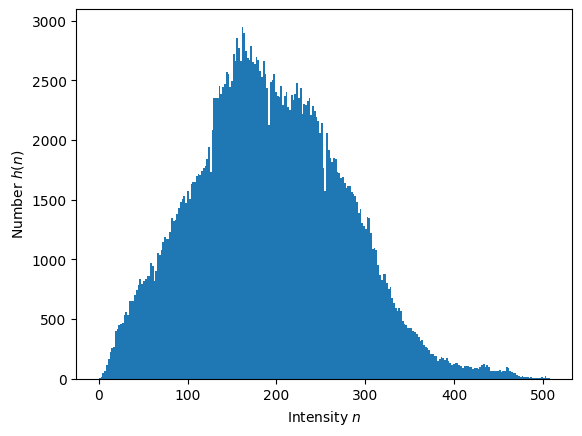

Intensity value with the biggest amount of pixels is: 160.73437500000003
Number of pixels correspoding to this intensity is: 2948.0


In [25]:
grayscale_hist = plt.hist(cA.ravel(), bins = 256)
plt.xlabel('Intensity $n$')
plt.ylabel('Number $h(n)$')
plt.show()

max_pixels = 0
intensity_index = 0
for i in range(0, len(grayscale_hist[0])):
    if grayscale_hist[0][i] > max_pixels:
        max_pixels = grayscale_hist[0][i]
        intensity_index = i
print("Intensity value with the biggest amount of pixels is: {}".format(grayscale_hist[1][intensity_index]))
print("Number of pixels correspoding to this intensity is: {}".format(grayscale_hist[0][intensity_index]))

# 2

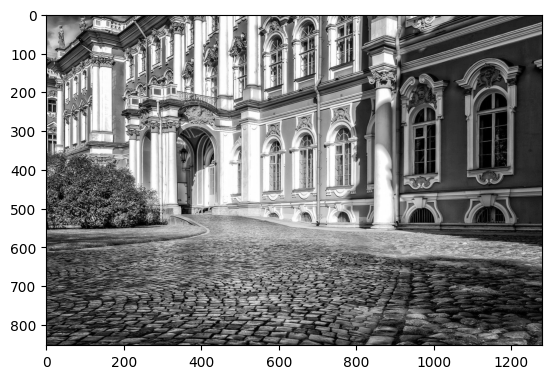

In [28]:
img = cv2.imread('/Users/misha/Desktop/GitHub/Machine-Learning/ITMO/OpenEdu/2_sem/Exercise_10/photo/2.jpeg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

In [29]:
c = pywt.dwt2(image, 'haar')
cA, (cH, cV, cD)= c

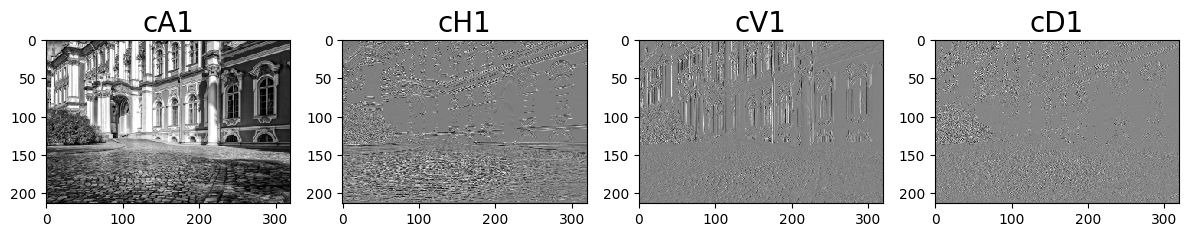

In [30]:
c1 = pywt.dwt2(cA,wavelet)
cA1, (cH1, cV1, cD1) = c1
titles = ['cA1', 'cH1', 'cV1', 'cD1']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA1, cH1, cV1, cD1]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

In [31]:
threshold = 70
h1 = cA1.shape[0] # у нас все наборы имеют вид квадратной матрицы
for i in range(h1):
      cA1[i][np.abs(cA1[i])<threshold] = 0.0 # для cA1
      for j in range(len(c1[1])):
         c1[1][j][i][np.abs(c1[1][j][i])<threshold] = 0.0  # для cH1,cV1,cD1

In [32]:
print('Количество нулей в наборе cA1 =',sum(sum(c1[0][m] == 0) for m in range(len(c1[0]))))
print('Количество нулей в наборе cH1 =',sum(sum(c1[1][0][m] == 0) for m in range(len(c1[1][0]))))
print('Количество нулей в наборе cV1 =',sum(sum(c1[1][1][m] == 0) for m in range(len(c1[1][1]))))
print('Количество нулей в наборе cD1 =',sum(sum(c1[1][2][m] == 0) for m in range(len(c1[1][2]))))

Количество нулей в наборе cA1 = 2031
Количество нулей в наборе cH1 = 52976
Количество нулей в наборе cV1 = 60224
Количество нулей в наборе cD1 = 64944


In [33]:
cv2.imwrite('test_haar.jpg',cA1)

True

Нужная картинка:
/Users/misha/Desktop/GitHub/Machine-Learning/ITMO/OpenEdu/2_sem/Exercise_10/photo/find/c1_138_hermitage-3711588_1280.jpeg
Нужная картинка:
/Users/misha/Desktop/GitHub/Machine-Learning/ITMO/OpenEdu/2_sem/Exercise_10/photo/find/c1_574_hermitage-3711588_1280.jpeg


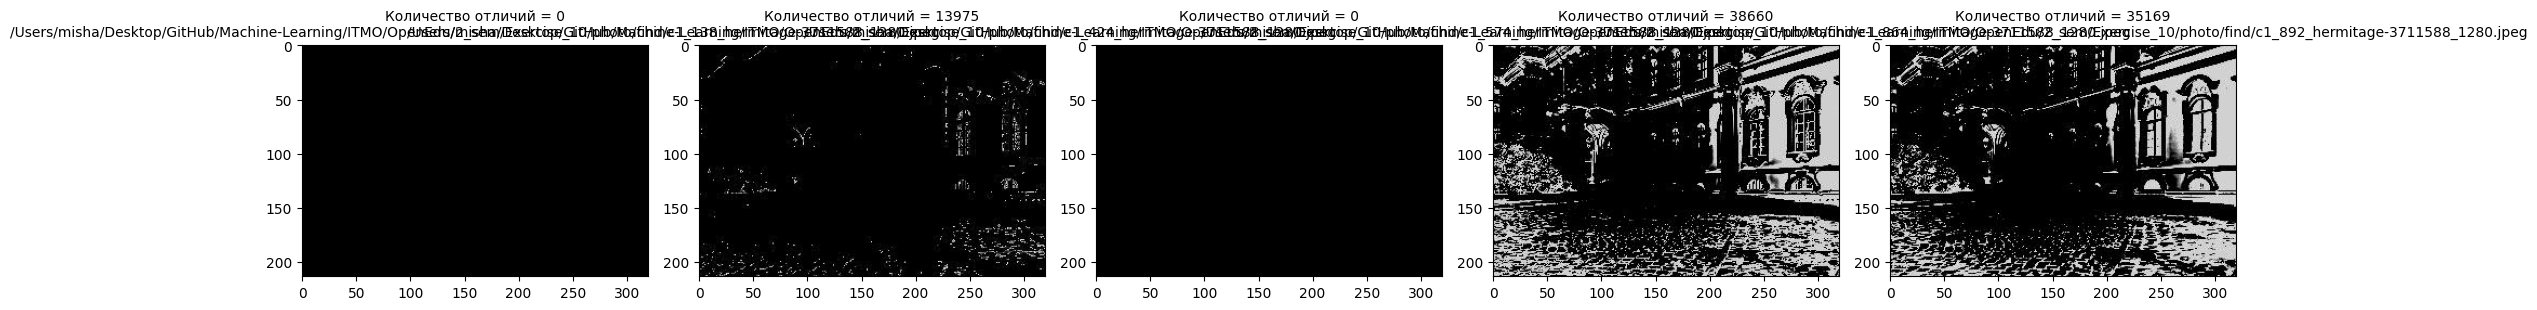

In [35]:
from PIL import Image, ImageChops, ImageOps
img_haar=Image.open('test_haar.jpg')  
img_names = [    
  '/Users/misha/Desktop/GitHub/Machine-Learning/ITMO/OpenEdu/2_sem/Exercise_10/photo/find/c1_138_hermitage-3711588_1280.jpeg',
  '/Users/misha/Desktop/GitHub/Machine-Learning/ITMO/OpenEdu/2_sem/Exercise_10/photo/find/c1_424_hermitage-3711588_1280.jpeg',
  '/Users/misha/Desktop/GitHub/Machine-Learning/ITMO/OpenEdu/2_sem/Exercise_10/photo/find/c1_574_hermitage-3711588_1280.jpeg',
  '/Users/misha/Desktop/GitHub/Machine-Learning/ITMO/OpenEdu/2_sem/Exercise_10/photo/find/c1_864_hermitage-3711588_1280.jpeg',
  '/Users/misha/Desktop/GitHub/Machine-Learning/ITMO/OpenEdu/2_sem/Exercise_10/photo/find/c1_892_hermitage-3711588_1280.jpeg',
]
size = img_haar.size
fig = plt.figure(figsize=(20, 3))
for i in range(len(img_names)):
  img_openebu=Image.open(img_names[i]) # открываем изображение опенебу
  result = ImageChops.difference(img_haar, img_openebu)
  ax = fig.add_subplot(1, 5, i + 1)
  ax.imshow(result, cmap = 'gray')
  count = 0
  for x in range(size[0]):
    for y in range(size[1]):
      if (result.getpixel((x, y)) != 0):
        count += 1
  ax.set_title("Количество отличий = "+str(count)+"\n"+img_names[i], fontsize=10)
  if (count == 0):
    print("Нужная картинка:\n" + img_names[i])
fig.tight_layout()
plt.show()